<a href="https://colab.research.google.com/github/Belvinbarasa/Eng.barasa/blob/main/Time_series_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller, acf, pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [ ]:
# Generate Synthetic Climate Dataset
date_rng = pd.date_range(start='2010-01-01', end='2025-01-01', freq='D')
data = {
    'date': date_rng,
    'temperature': np.random.normal(loc=20, scale=5, size=len(date_rng)),
    'humidity': np.random.normal(loc=60, scale=10, size=len(date_rng)),
    'precipitation': np.random.uniform(0, 10, len(date_rng))

}
df = pd.DataFrame(data)
df.set_index('date', inplace=True)

In [ ]:
# Resample to weekly data
df_resampled = df.resample('W').mean()

In [ ]:
# Detect Outliers
Q1 = df_resampled.quantile(0.25)
Q3 = df_resampled.quantile(0.75)
IQR = Q3 - Q1
df_no_outliers = df_resampled[~((df_resampled< (Q1 - 1.5 * IQR)) | (df_resampled > (Q3 + 1.5 * IQR))).any(axis=1)]

In [ ]:
# Normalize Data
scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_no_outliers), columns=df_no_outliers.columns, index=df_no_outliers.index)

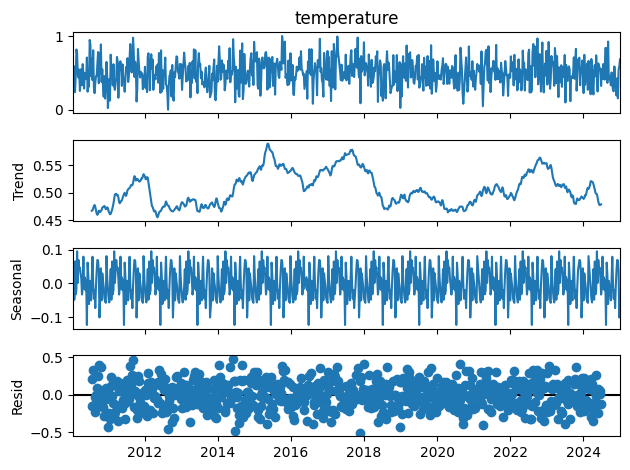

In [ ]:
# Time Series Decomposition
result = seasonal_decompose(df_scaled['temperature'], model='additive', period=52)
result.plot()
plt.show()

In [ ]:
# Stationarity Test (ADF Test)
def adf_test(series):
    result = adfuller(series)
    print(f"ADF Statistic: {result[0]}")
    print(f"p-value: {result[1]}")
    print("Stationary" if result[1] < 0.05 else "Not Stationary")

adf_test(df_scaled['temperature'])

ADF Statistic: -26.960982779598165
p-value: 0.0
Stationary


<function matplotlib.pyplot.show(close=None, block=None)>

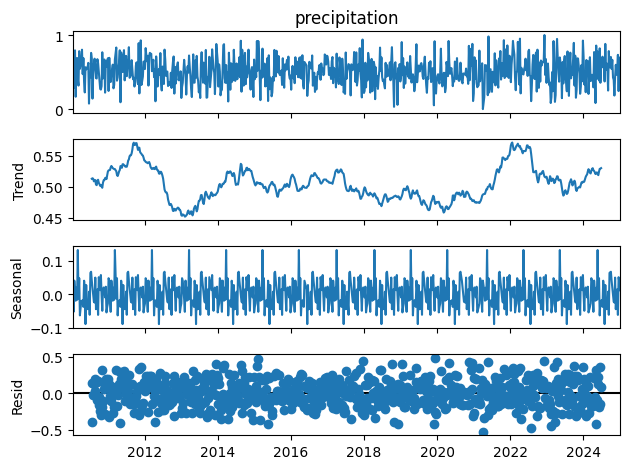

In [ ]:
# Time series Decomposition
result = seasonal_decompose(df_scaled['precipitation'], model='additive', period=52)
result.plot()
plt.show

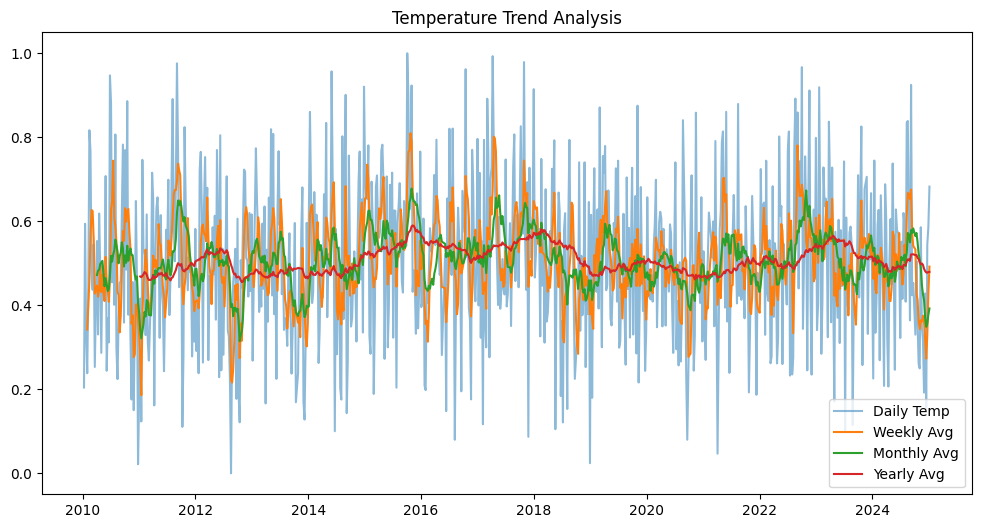

In [ ]:
# Rolling Averages Visualization
plt.figure(figsize=(12, 6))
plt.plot(df_scaled.index, df_scaled['temperature'], label='Daily Temp', alpha=0.5)
plt.plot(df_scaled.index, df_scaled['temperature'].rolling(window=4).mean(), label='Weekly Avg')
plt.plot(df_scaled.index, df_scaled['temperature'].rolling(window=12).mean(), label='Monthly Avg')
plt.plot(df_scaled.index, df_scaled['temperature'].rolling(window=52).mean(), label='Yearly Avg')
plt.legend()
plt.title('Temperature Trend Analysis')
plt.show()

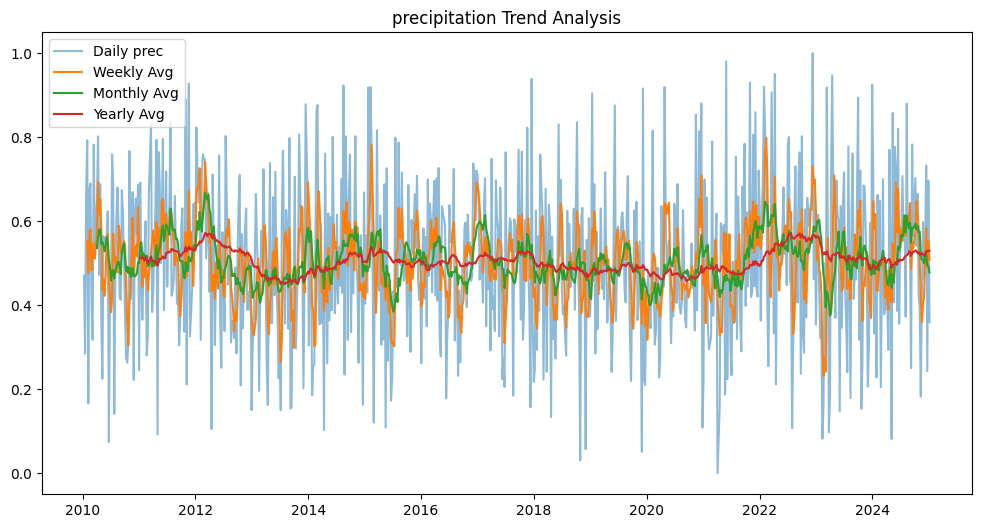

In [ ]:
# Rolling Averages Visualization
plt.figure(figsize=(12, 6))
plt.plot(df_scaled.index, df_scaled['precipitation'], label='Daily prec', alpha=0.5)
plt.plot(df_scaled.index, df_scaled['precipitation'].rolling(window=4).mean(), label='Weekly Avg')
plt.plot(df_scaled.index, df_scaled['precipitation'].rolling(window=12).mean(), label='Monthly Avg')
plt.plot(df_scaled.index, df_scaled['precipitation'].rolling(window=52).mean(), label='Yearly Avg')
plt.legend()
plt.title('precipitation Trend Analysis')
plt.show()

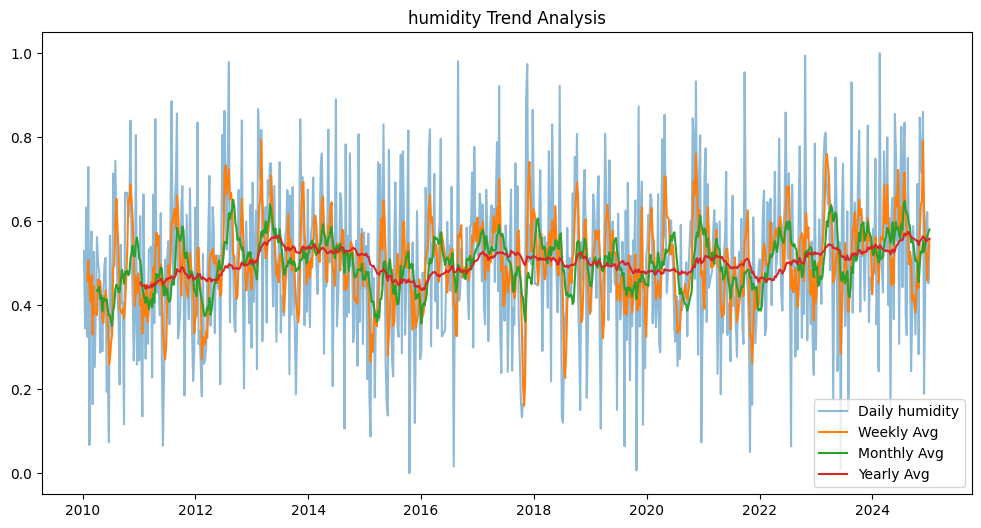

In [ ]:
# Rolling Averages Visualization
plt.figure(figsize=(12, 6))
plt.plot(df_scaled.index, df_scaled['humidity'], label='Daily humidity', alpha=0.5)
plt.plot(df_scaled.index, df_scaled['humidity'].rolling(window=4).mean(), label='Weekly Avg')
plt.plot(df_scaled.index, df_scaled['humidity'].rolling(window=12).mean(), label='Monthly Avg')
plt.plot(df_scaled.index, df_scaled['humidity'].rolling(window=52).mean(), label='Yearly Avg')
plt.legend()
plt.title('humidity Trend Analysis')
plt.show()

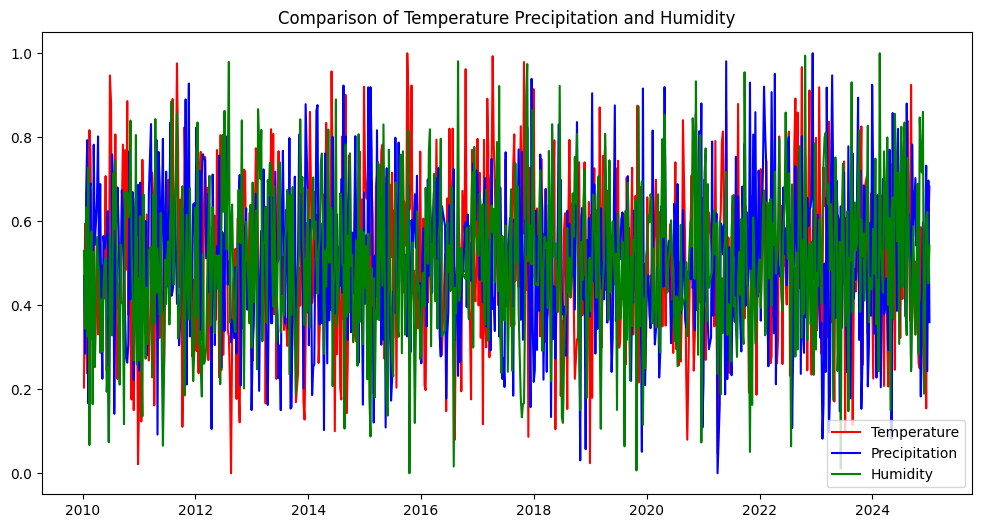

In [ ]:
# Comparison of Precipitation and Temperature and Humidity
plt.figure(figsize=(12, 6))
plt.plot(df_scaled.index, df_scaled['temperature'], label='Temperature', color='r')
plt.plot(df_scaled.index, df_scaled['precipitation'], label='Precipitation', color='b')
plt.plot(df_scaled.index, df_scaled['humidity'], label='Humidity', color='g')
plt.legend()
plt.title('Comparison of Temperature Precipitation and Humidity')
plt.show()

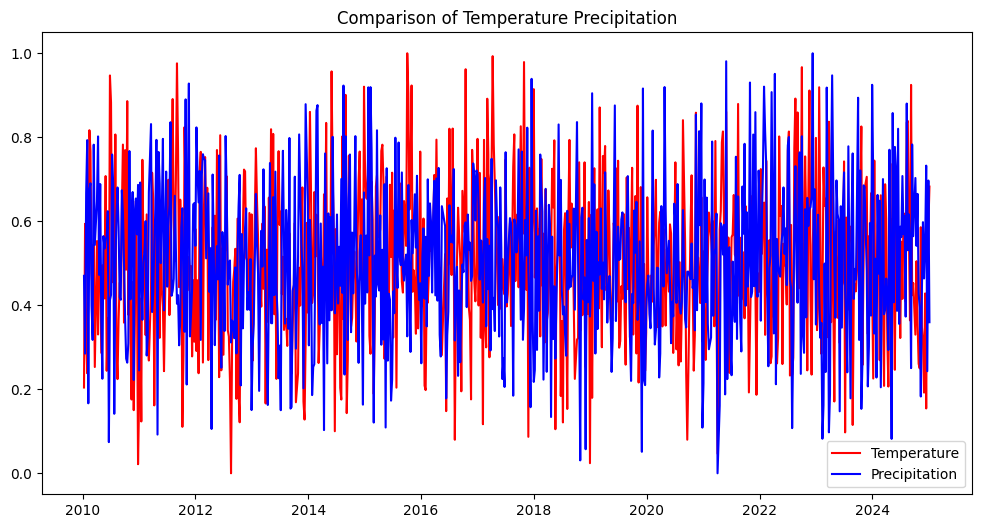

In [ ]:
# Comparison of Precipitation and Temperature
plt.figure(figsize=(12, 6))
plt.plot(df_scaled.index, df_scaled['temperature'], label='Temperature', color='r')
plt.plot(df_scaled.index, df_scaled['precipitation'], label='Precipitation', color='b')
plt.legend()
plt.title('Comparison of Temperature Precipitation')
plt.show()

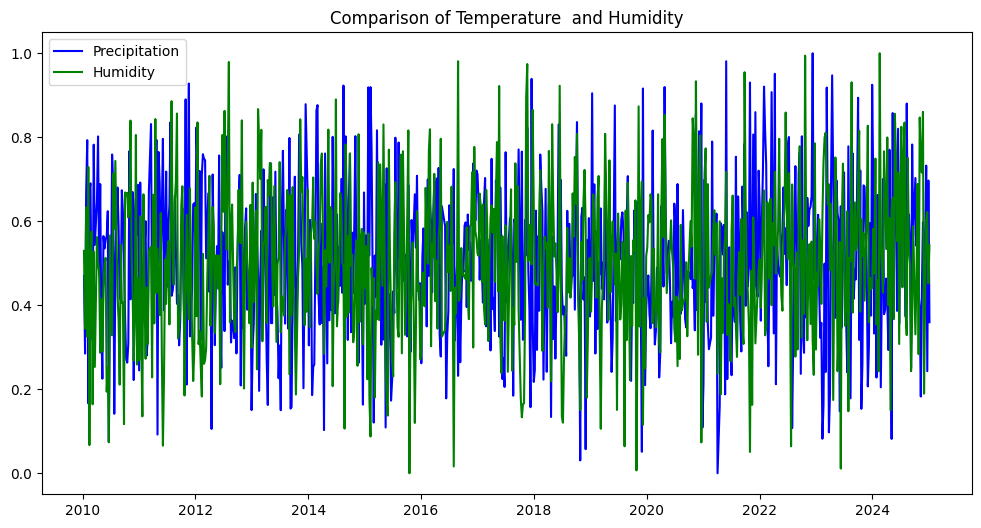

In [ ]:
# Comparison of Precipitation and  Humidity
plt.figure(figsize=(12, 6))
plt.plot(df_scaled.index, df_scaled['precipitation'], label='Precipitation', color='b')
plt.plot(df_scaled.index, df_scaled['humidity'], label='Humidity', color='g')
plt.legend()
plt.title('Comparison of Temperature  and Humidity')
plt.show()

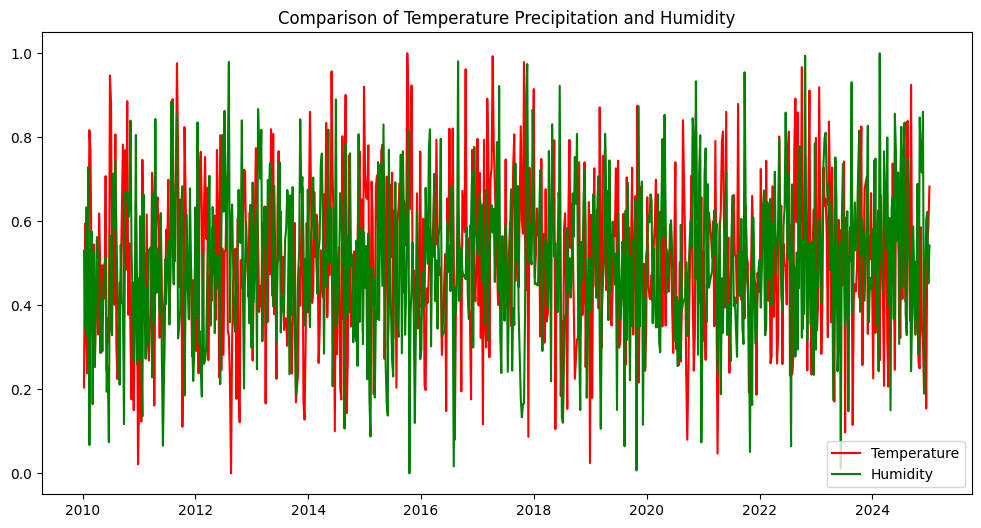

In [ ]:
# Comparison of Temperature and Humidity
plt.figure(figsize=(12, 6))
plt.plot(df_scaled.index, df_scaled['temperature'], label='Temperature', color='r')
plt.plot(df_scaled.index, df_scaled['humidity'], label='Humidity', color='g')
plt.legend()
plt.title('Comparison of Temperature Precipitation and Humidity')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

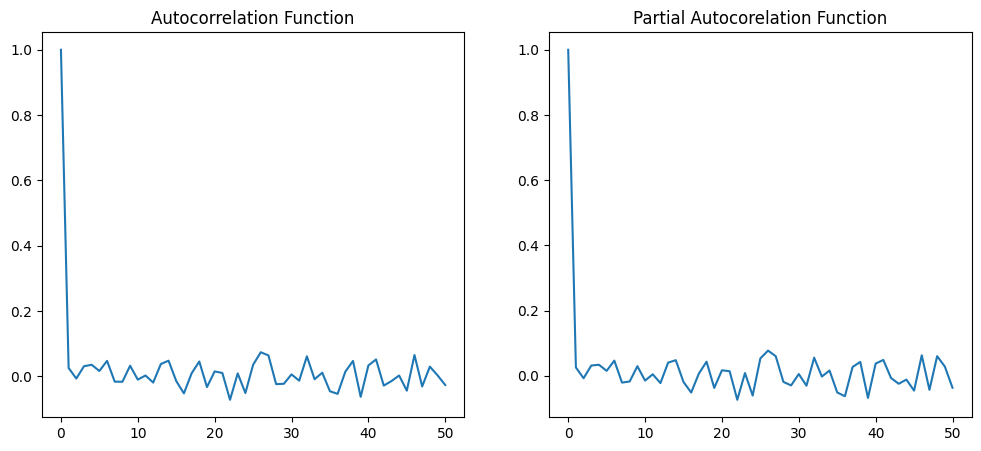

In [ ]:
# Autocorrelation and Partial Autocorrelation
plt.figure(figsize=(12, 5))
plt.subplot(121)
plt.plot(acf(df_scaled['temperature'], nlags=50))
plt.title('Autocorrelation Function')
plt.subplot(122)
plt.plot(pacf(df_scaled['temperature'], nlags=50))
plt.title('Partial Autocorelation Function')
plt.show

In [ ]:
# ARIMA Model for Temperature
train_size = int(len(df_scaled) * 0.8)
train_temp, test_temp = df_scaled['temperature'][:train_size], df_scaled['temperature'][train_size:]
model_temp = ARIMA(train_temp, order=(5, 1, 0))
model_fit_temp = model_temp.fit()
predictions_temp = model_fit_temp.forecast(steps=len(test_temp))

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/p

In [ ]:
# ARIMA Model for Temperature
train_precip, test_precip = df_scaled['precipitation'][:train_size], df_scaled['precipitation'][train_size:]
model_precip = ARIMA(train_precip, order=(5, 1, 0))
model_fit_precip = model_precip.fit()
predictions_precip = model_fit_precip.forecast(steps=len(test_precip))

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/p

In [ ]:
# Model Evaluation
mae_temp = mean_absolute_error(test_temp, predictions_temp)
mse_temp = mean_squared_error(test_temp, predictions_temp)
rmse_temp = np.sqrt(mse_temp)
print(f"Temperature Model - MAE: {mse_temp},  MSE: {mse_temp}, RMSE: {rmse_temp}")

Temperature Model - MAE: 0.04682656974153551,  MSE: 0.04682656974153551, RMSE: 0.21639447715118681


In [ ]:
# Model Evaluation
mae_precip = mean_absolute_error(test_precip, predictions_precip)
mse_precip = mean_squared_error(test_precip, predictions_precip)
rmse_precip = np.sqrt(mse_precip)
print(f"Precipitation Model - MAE: {mse_precip},  MSE: {mse_precip}, RMSE: {rmse_precip}")

Precipitation Model - MAE: 0.04837066287816136,  MSE: 0.04837066287816136, RMSE: 0.2199333146164113


In [ ]:
# Future Prediction Function
def predict_future(days):
    future_dates = pd.date_range(start=df_scaled.index[-1], periods=days+1, freq='W'[1:])
    forecast_temp = model_fit_temp.forecast(steps=days)
    forecast_precip = model_fit_precip.forecast(steps=days)
    predicted_df = pd.DataFrame({'Date': future_dates, 'Predicted Temperature': forecast_temp, 'Predicted Precipitation': forecast_precip})

    # Plot the predictions
    plt.figure(figsize=(12, 6))
    plt.plot(future_dates, forecast_temp, label='Prediction Temperature', linestyle='dashed', color='r')
    plt.plot(future_dates, forecast_precip, label='Predicted Precipitation', linestyle='dashed', color='b')
    plt.legend()
    plt.title(f"Future Predictions for {days} Days")
    plt.show()

    return predicted_df

In [ ]:
def predict_future(days):
    # Change the freq to 'W' which is Weekly
    # The periods argument should be equal to days for future_dates
    future_dates = pd.date_range(start=df_scaled.index[-1], periods=days, freq='W')
    forecast_temp = model_fit_temp.forecast(steps=days)
    forecast_precip = model_fit_precip.forecast(steps=days)
    predicted_df = pd.DataFrame({'Date': future_dates, 'Predicted Temperature': forecast_temp, 'Predicted Precipitation': forecast_precip})

    # Plot the predictions
    plt.figure(figsize=(12, 6))
    plt.plot(future_dates, forecast_temp, label='Prediction Temperature', linestyle='dashed', color='r')
    plt.plot(future_dates, forecast_precip, label='Predicted Precipitation', linestyle='dashed', color='b')
    plt.legend()
    plt.title(f"Future Predictions for {days} Days")
    plt.show()

    return predicted_df

Enter number of days to predict: 10


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


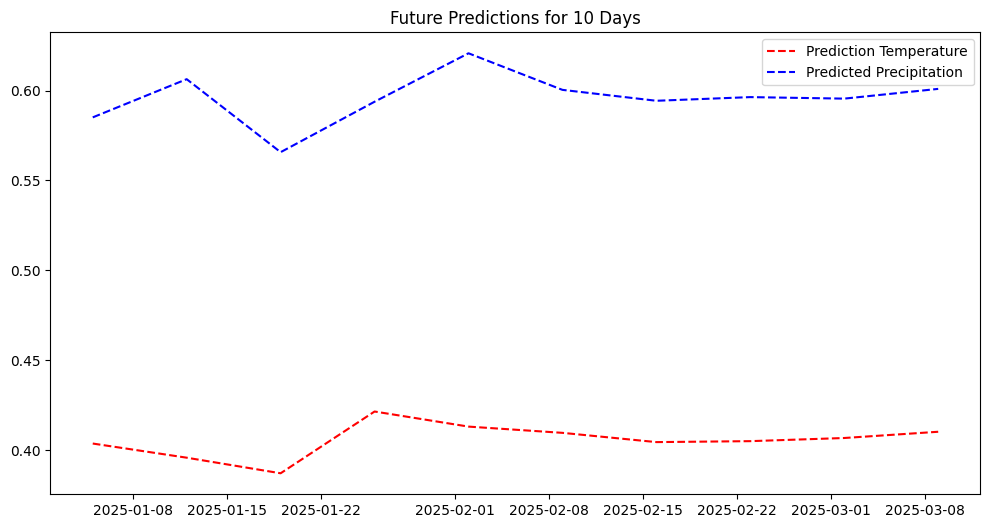

          Date  Predicted Temperature  Predicted Precipitation
613 2025-01-05               0.403667                 0.585077
614 2025-01-12               0.395793                 0.606322
615 2025-01-19               0.387124                 0.565719
616 2025-01-26               0.421478                 0.593777
617 2025-02-02               0.413086                 0.620728
618 2025-02-09               0.409613                 0.600379
619 2025-02-16               0.404463                 0.594311
620 2025-02-23               0.404991                 0.596348
621 2025-03-02               0.406745                 0.595507
622 2025-03-09               0.410216                 0.600925


In [ ]:
# Example Usage
days_to_predict = int(input("Enter number of days to predict: "))
predicted_df = predict_future(days_to_predict)
print(predicted_df)